Date first few rows:     MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model Year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   US Made  
0        1  
1        1  
2        1  
3        1  
4        1  
Initial Data Inspection:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-

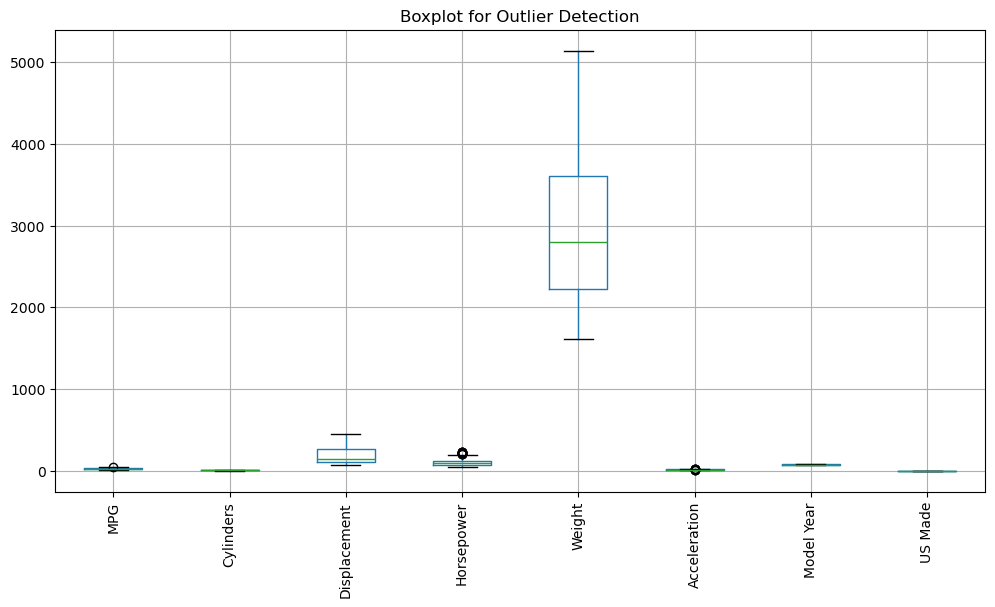

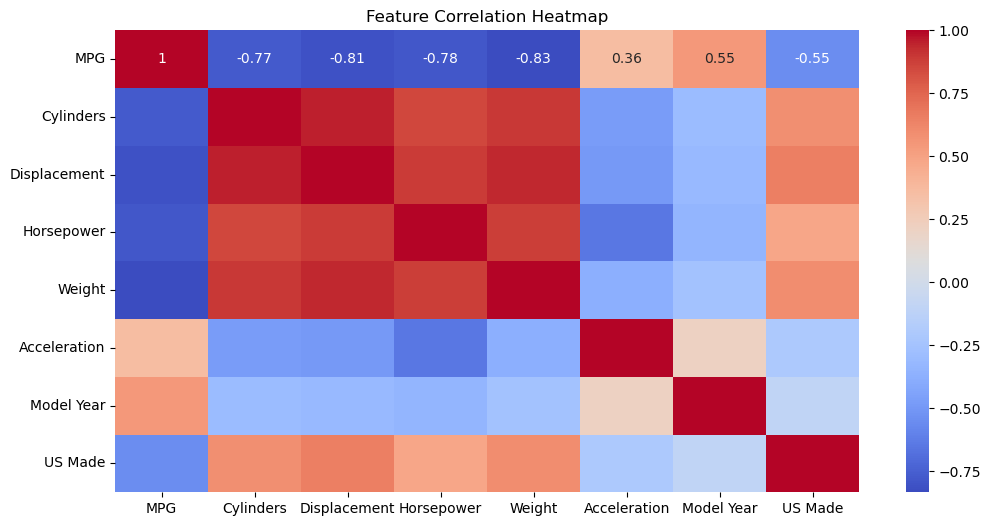

C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

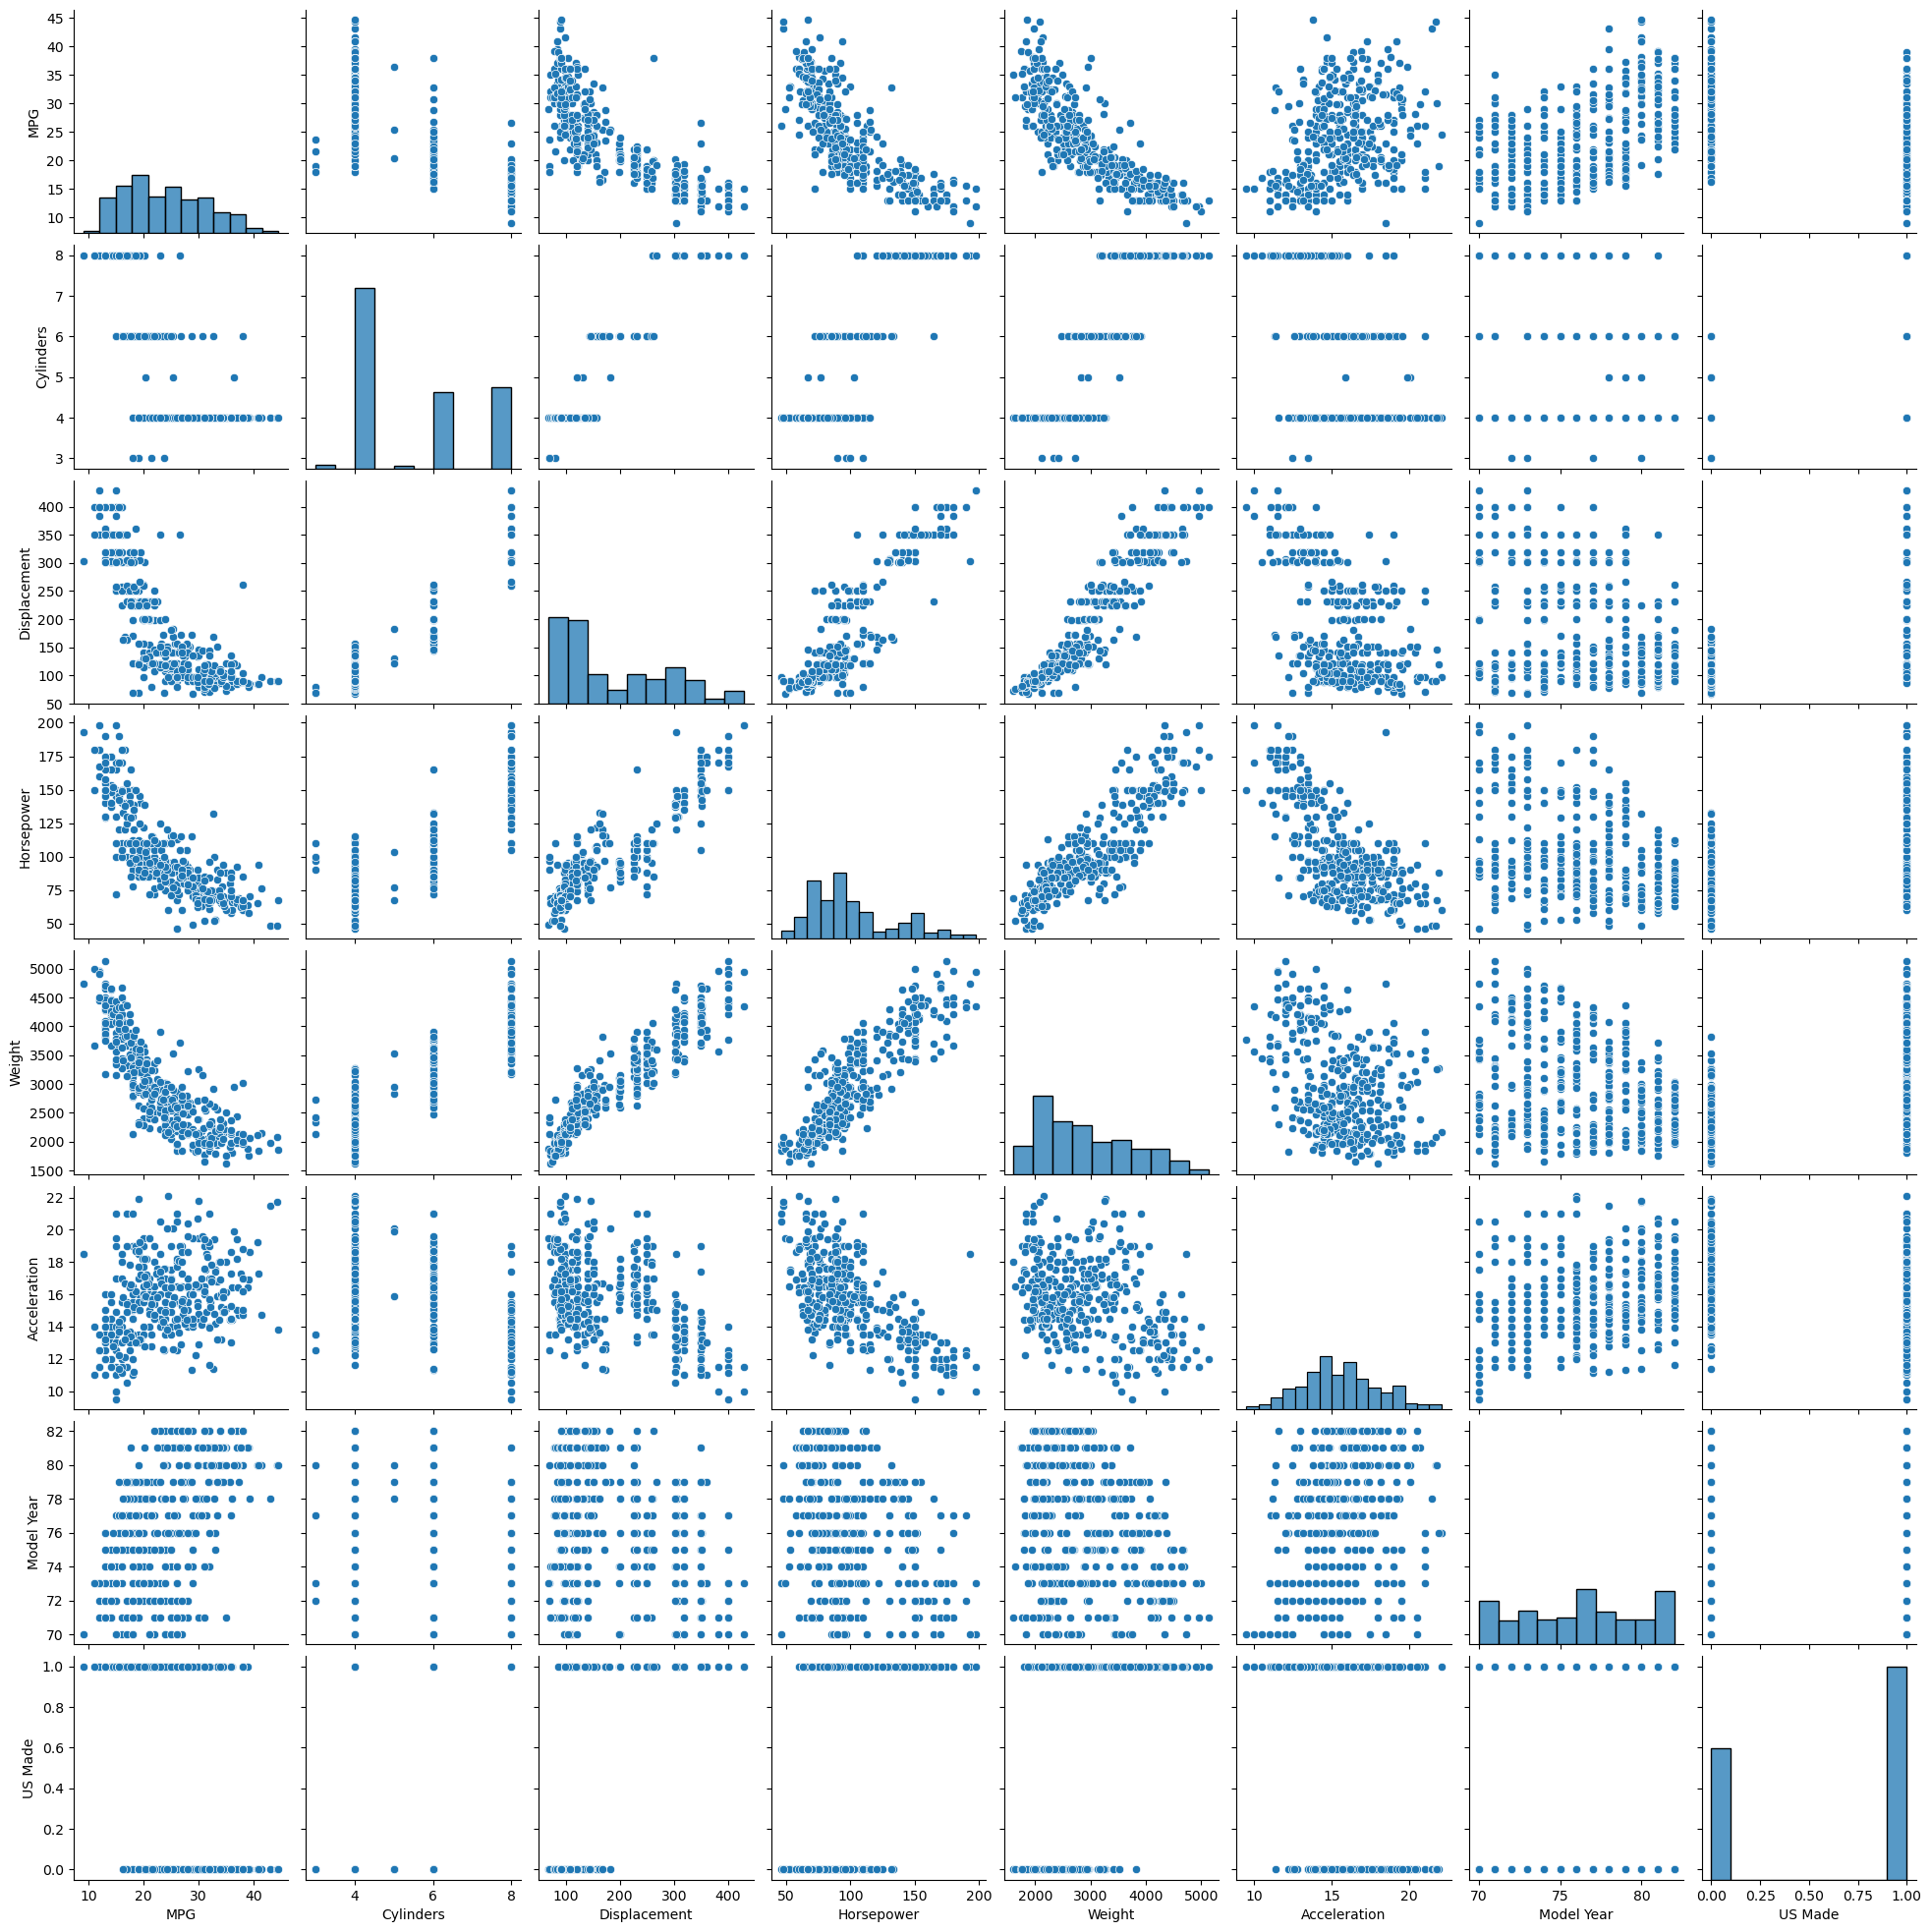


Variance Inflation Factor (VIF) for Features:
        Feature        VIF
0     Cylinders  35.504266
1  Displacement  62.938605
2    Horsepower  17.966961
3        Weight  40.754738
4  Acceleration   5.353448
5    Model Year   3.795338
6       US Made   5.094109

Linear Regression Evaluation:
MAE: 0.11883662787025183
MSE: 0.02079783336363208
RMSE: 0.14421453936282597
R-squared: 0.6492630901649462

Ridge Regression Evaluation:
R-squared: 0.6479271207118753

Lasso Regression Evaluation:
R-squared: 0.5739284160057561


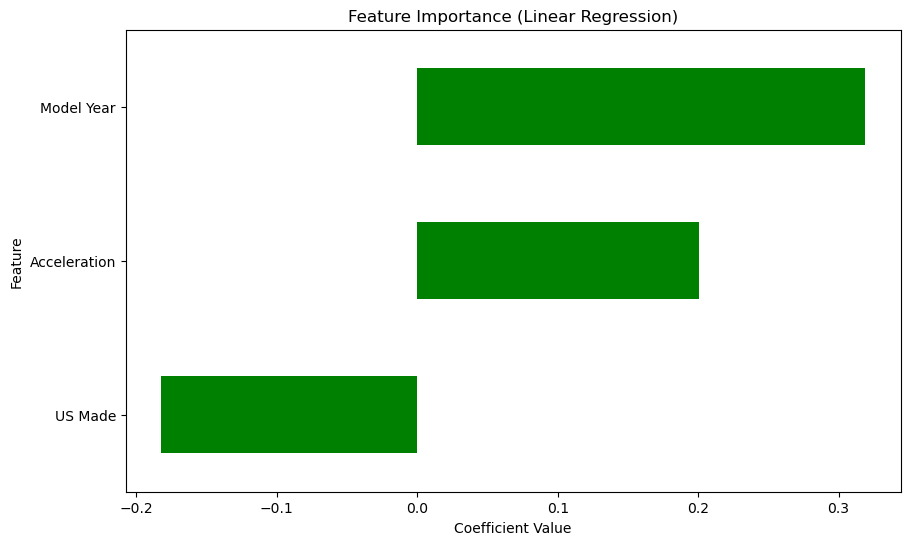

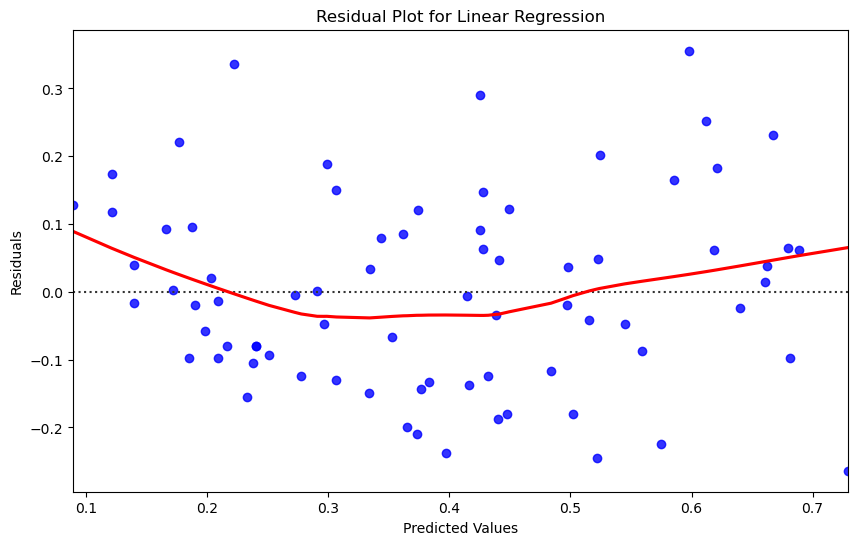

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.91e-50
Time:                        00:00:48   Log-Likelihood:                 172.07
No. Observations:                 302   AIC:                            -336.1
Df Residuals:                     298   BIC:                            -321.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2636      0.028      9.331   

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading the dataset
df = pd.read_csv("car.csv")
print("Date first few rows:",df.head())
# Data Cleaning
print("Initial Data Inspection:")
print(df.info())
print(df.describe())

print("Missing Values:",df.isnull().sum())

# Converting applicable columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Handling++ Missing Values
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Detecting Outliers using Boxplots
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

# Removing Outliers using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Normalize Continuous Features
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Splitting Features and Target
X = df.drop('MPG', axis=1)
y = df['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for Features:")
print(vif_data)

# Removing highly collinear features (VIF > 10)
X = X.loc[:, vif_data[vif_data["VIF"] < 10]["Feature"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluate Linear Regression Model
print("\nLinear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

# Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Evaluation:")
print("R-squared:", r2_score(y_test, y_pred_ridge))

# Lasso Regression Model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression Evaluation:")
print("R-squared:", r2_score(y_test, y_pred_lasso))

# Feature Importance Analysis
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='green')
plt.title("Feature Importance (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Residual Analysis
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# StatsModels Analysis
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

# Identifying most significant features
significant_features = model.pvalues[model.pvalues < 0.05].index
significant_features = significant_features.drop("const", errors='ignore')
print("Significant Features contributing to MPG:", significant_features.tolist())


